In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
#link lengths (in mm)
l1 = 85  
l2 = 20   
l3 = 75   
l4 = 50   

In [3]:
#angular velocity of the crank (rad/s)
omega2 = 10  #assumming omega2 to be 10, for analysis
alpha2 = 0  #constant omega2

In [4]:
#inclination angle of front mechanism's fixed link
beta1 = np.radians(80)  

In [5]:
#initialize arrays for storing results
theta2_vals = np.linspace(0, 2*np.pi, 100)  #crank angles from 0 to 360 degrees
theta3_vals = []
theta4_vals = []
omega3_vals = []
omega4_vals = []
alpha3_vals = []
alpha4_vals = []

In [6]:
#function to solve displacement equations
def equations(vars, theta2, l2, l3, l4,l1, beta):
    theta3, theta4 = vars
    eq1 = l2 * np.cos(theta2) - l3 * np.cos(theta3) - l4 * np.cos(theta4) - l1 * np.cos(beta)
    eq2 = l2 * np.sin(theta2) - l3 * np.sin(theta3) - l4 * np.sin(theta4) - l1 * np.sin(beta)
    return [eq1, eq2]

In [7]:
#function to solve acceleration equations
def compute_equations(vars1, l2, l3, l4, theta2, theta3, theta4, omega2, omega3, omega4,alpha2):
    alpha3, alpha4 = vars1
    acc1 = -l4 * (np.cos(theta4) * omega4**2 + alpha4 * np.sin(theta4)) - \
           l3 * (np.cos(theta3) * omega3**2 + alpha3 * np.sin(theta3)) + \
           l2 * (np.cos(theta2) * omega2**2 + alpha2 * np.sin(theta2))
    
    acc2 = l4 * (-np.sin(theta4) * omega4**2 + np.cos(theta4) * alpha4) + \
           l3 * (-np.sin(theta3) * omega3**2 + np.cos(theta3) * alpha3) - \
           l2 * (-np.sin(theta2) * omega2**2 + np.cos(theta2) * alpha2)
    
    return [acc1, acc2]

In [8]:
#loop through crank angles
for theta2 in theta2_vals:
    #displacement analysis
    initial_guess = [np.radians(190), np.radians(280)]
    theta3, theta4 = fsolve(equations, initial_guess, args=(theta2, l2, l3, l4,l1, beta1))
    theta3_vals.append(theta3)
    theta4_vals.append(theta4)

    #velocity analysis
    omega3 = (l2 * omega2 * np.sin(theta2 - theta4)) / (l3 * np.sin(theta3 - theta4))
    omega4 = (l2 * omega2 * np.sin(theta2 - theta3)) / (l4 * np.sin(theta4 - theta3))
    
    omega3_vals.append(omega3)
    omega4_vals.append(omega4)

    #acceleration analysis
    ini_guess_acc = [15, 20]
    alpha3, alpha4 = fsolve(compute_equations, ini_guess_acc, args=(l2, l3, l4, theta2, theta3, theta4, omega2, omega3, omega4,alpha2))
    
    alpha3_vals.append(alpha3)
    alpha4_vals.append(alpha4)

In [9]:
#convert angles to degrees for plotting
theta2_vals_deg = np.degrees(theta2_vals)
theta3_vals_deg = np.degrees(theta3_vals)
theta4_vals_deg = np.degrees(theta4_vals)

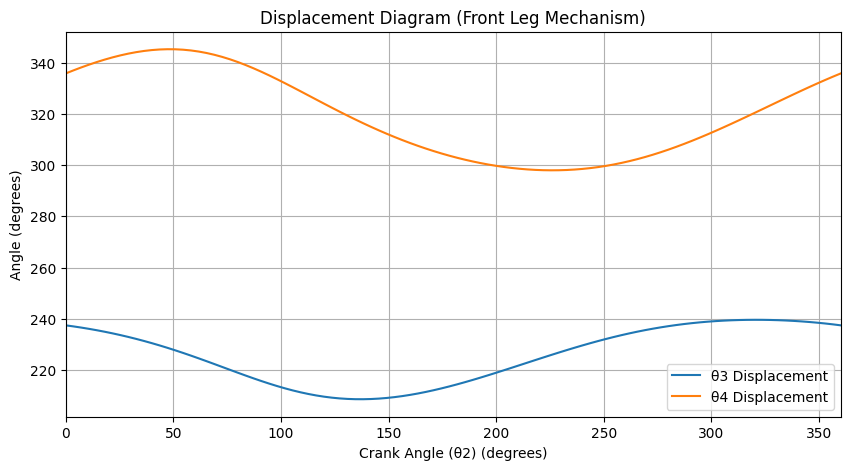

In [10]:
#plot displacement diagram
plt.figure(figsize=(10, 5))
plt.plot(theta2_vals_deg, theta3_vals_deg, label='θ3 Displacement')
plt.plot(theta2_vals_deg, theta4_vals_deg, label='θ4 Displacement')
plt.xlim(0,360)
plt.xlabel("Crank Angle (θ2) (degrees)")
plt.ylabel("Angle (degrees)")
plt.title("Displacement Diagram (Front Leg Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech1_dis.png', format='png')
plt.show()

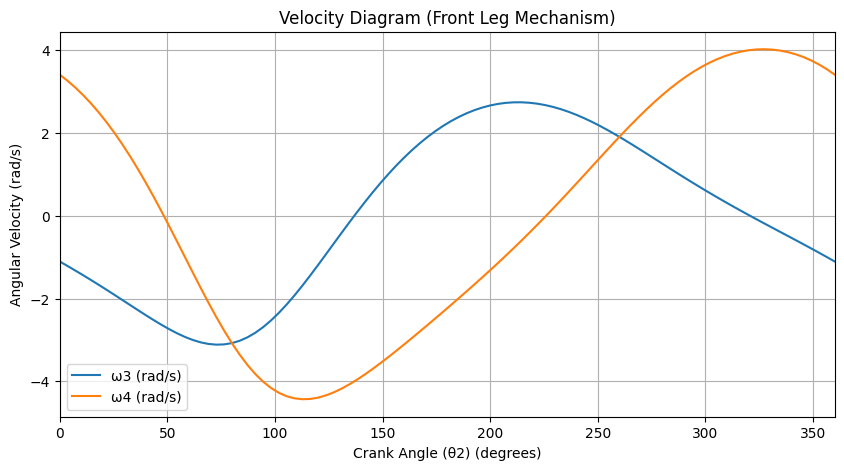

In [11]:
#plot velocity diagram
plt.figure(figsize=(10, 5))
plt.plot(theta2_vals_deg, omega3_vals, label='ω3 (rad/s)')
plt.plot(theta2_vals_deg, omega4_vals, label='ω4 (rad/s)')
plt.xlim(0,360)
plt.xlabel("Crank Angle (θ2) (degrees)")
plt.ylabel("Angular Velocity (rad/s)")
plt.title("Velocity Diagram (Front Leg Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech1_vel.png', format='png')
plt.show()

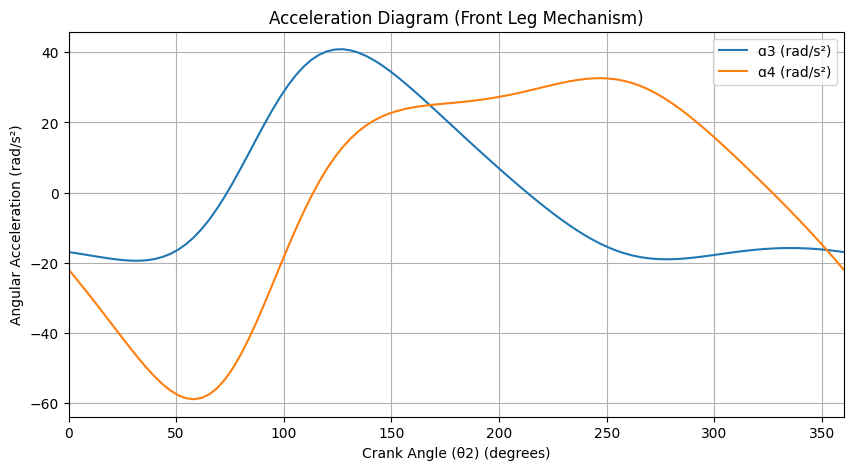

In [12]:
#plot acceleration diagram 
plt.figure(figsize=(10, 5))
plt.plot(theta2_vals_deg, alpha3_vals, label='ɑ3 (rad/s²)')
plt.plot(theta2_vals_deg, alpha4_vals, label='ɑ4 (rad/s²)')
plt.xlim(0,360)
plt.xlabel("Crank Angle (θ2) (degrees)")
plt.ylabel("Angular Acceleration (rad/s²)")
plt.title("Acceleration Diagram (Front Leg Mechanism)")
plt.legend()
plt.grid()
plt.savefig('mech1_acc.png', format='png')
plt.show()